In [1]:
from numpy.random import seed
seed(1)
import tensorflow
tensorflow.random.set_seed(2)
import math
import numpy as np
import pandas as pd
import pickle
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU
from numpy import genfromtxt
from pandas_datareader import data as pdr
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from scipy.stats import mannwhitneyu

In [2]:
def GRU_Model(output_window):
  model = Sequential()
  model.add(GRU(150, return_sequences=False, input_shape=(X_train.shape[1], 1)))
  model.add(Dense(output_window))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.summary()
  return model

def LSTM_Model(output_window):
  model = Sequential()
  model.add(LSTM(150, return_sequences=False, input_shape=(X_train.shape[1], 1)))
  model.add(Dense(output_window))
  model.compile(optimizer='adam', loss='mean_squared_error')
  model.summary()
  return model

Data set:    [[[-0.06657371]
  [-0.04981095]
  [-0.03310659]
  ...
  [ 0.30050689]
  [ 0.29790122]
  [ 0.29532761]]

 [[-0.06859129]
  [-0.05126447]
  [-0.03399733]
  ...
  [ 0.34696373]
  [ 0.3452061 ]
  [ 0.34347831]]

 [[-0.06907575]
  [-0.05180134]
  [-0.03458674]
  ...
  [ 0.29794357]
  [ 0.29523921]
  [ 0.29256932]]

 ...

 [[-0.06941363]
  [-0.05187886]
  [-0.03440303]
  ...
  [ 0.3007645 ]
  [ 0.2992479 ]
  [ 0.29778421]]

 [[-0.0683659 ]
  [-0.05090044]
  [-0.03349436]
  ...
  [ 0.29501561]
  [ 0.2934691 ]
  [ 0.29197409]]

 [[-0.06950268]
  [-0.05196727]
  [-0.03449072]
  ...
  [ 0.31945081]
  [ 0.31838454]
  [ 0.3173658 ]]]
grid_points:    (array([ 43.,  44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,
        54.,  55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,
        65.,  66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,
        76.,  77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,
        87.,  88.,  89.,  90.,  91.,  92.,  93.,

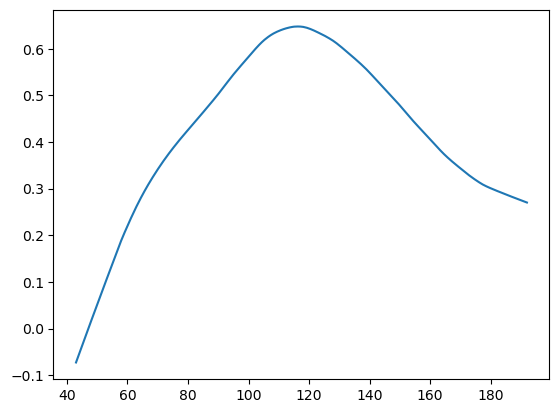

In [3]:
with open('hdvi.pickle', 'rb') as handle:
    NDVI = pickle.load(handle)
print(NDVI)
NDVI[30].plot()
serie = NDVI[40].data_matrix.flatten()

In [4]:
f = 365

d_GRU = {'ds': np.arange(43,193), 'y': serie}
data_GRU = pd.DataFrame(data=d_GRU)
print(data_GRU.shape)


(150, 2)


In [5]:
# Train LSTM model
#lstm_trained = lstm_model.fit(data_GRU.to_numpy(), epochs=epochs)
## Train GRU model
#gru_trained = gru_model.fit(data_GRU.to_numpy(), epochs=epochs)
def create_dataset (X, look_back = 1):
    Xs, ys = [], []
 
    for i in range(len(X)-look_back):
        v = X[i:i+look_back]
        Xs.append(v)
        ys.append(X[i+look_back])
 
    return np.array(Xs), np.array(ys)
    
LOOK_BACK = 30
X_train, y_train = create_dataset(serie,LOOK_BACK)
#X_test, y_test = create_dataset(test_scaled,LOOK_BACK)
print(X_train.shape)
lstm_model = LSTM_Model(60)
gru_model = GRU_Model(60)
epochs = 200 

lstm_trained = lstm_model.fit(x=X_train,y=y_train, epochs=epochs)
gru_trained = gru_model.fit(x=X_train,y=y_train, epochs=epochs)

(120, 30)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 150)               91200     
                                                                 
 dense (Dense)               (None, 60)                9060      
                                                                 
Total params: 100,260
Trainable params: 100,260
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 150)               68850     
                                                                 
 dense_1 (Dense)             (None, 60)                9060      
                                                                 
Total params: 77,9

ValueError: in user code:

    File "c:\Users\Leo\.conda\envs\Agrivision\lib\site-packages\keras\engine\training.py", line 1249, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\Leo\.conda\envs\Agrivision\lib\site-packages\keras\engine\training.py", line 1233, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\Leo\.conda\envs\Agrivision\lib\site-packages\keras\engine\training.py", line 1222, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\Leo\.conda\envs\Agrivision\lib\site-packages\keras\engine\training.py", line 1023, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\Leo\.conda\envs\Agrivision\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\Leo\.conda\envs\Agrivision\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 30, 1), found shape=(None, 2)
